# Day1 - Afternoon - More *nix

_Note: this is a static notebook (ie. not interactive). All exercises and commands in this session will be performed directly in a terminal window.  To launch a new terminal, click on `File>New>Terminal`._

## Bash (shell) scripting

* manage complex workflows more easily
* work on a cluster
    - distribute multiple similar jobs
    - good responsible coding practice
* beginning of reproducible research

### A simple command

```
$ echo 'Hello, world!'
```

### Let's make it a script
To make this command into a reuseable script, we just need to put it into a file. Let's create a file `hiscript.sh` and put this command inside. (.sh is conventionally used to denote bash script files)

...

Once we've created this new file, we can save it and run the script by calling it directly as so.

```
$ bash hiscript.sh
```

`bash` is the bash 'shell interpreter'

Technically, we should add a bit more information to our file to make it an autonomous program

```
#!/bin/bash

echo 'Hello, world'
```

The 'shebang' (hash-bang) tells the computer what interpreter to use to run this command. It could be bash, as we have here, or perl, python etc.

finally, we need to change the permissions on the file. This makes the file into an executable program. Here we are adding the 'execute' permission to the file

```
$ chmod a+x hiscript.sh
```

And now we can run the file directly as an executable program.

```
$ ./hiscript.sh
```

### Permissions
Lets take a look again at the files in our directory

In [1]:
%%bash
ls -lh

total 3304
-rw-r--r--  1 loyalgoff  staff   1.1K Aug 27 20:57 Day1-overview.md
-rw-r--r--  1 loyalgoff  staff   994B Aug 27 20:57 Day1.0-Morning-Review_of_prereq_assignments.ipynb
-rw-r--r--  1 loyalgoff  staff   1.2M Aug 27 21:06 Day1.1-Morning-Unix_I.ipynb
-rw-r--r--  1 loyalgoff  staff   376K Aug 27 20:57 Day1.2-Morning-Intro_to_git_and_GitHub.ipynb
-rw-r--r--  1 loyalgoff  staff   8.6K Aug 27 21:41 Day1.3 - Afternoon - Unix_and_Bash.ipynb
drwxr-xr-x  3 loyalgoff  staff    96B Aug 27 20:57 data


The first set of characters in each returned line details the permissions of the file. The permissions are assigned based on three different 'levels' of users, and there are three types of permissions:

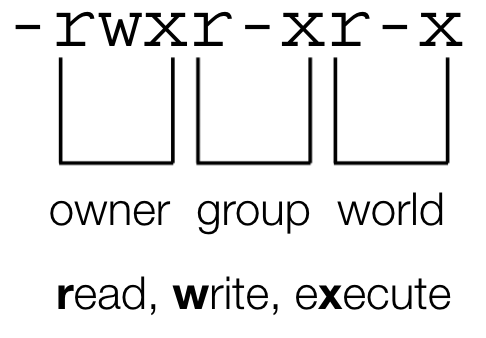

Specific permissions on a given file are added or removed for each 'level' using `chmod`

```
$ touch testfile  #creates an empty file named testfile
$ ls -l testfile   #what are the default permissions?
$ chmod +x testfile ##sets the execute bit for owner, group and world.
```

```
$ chmod 755 testfile ##sets rwx permissions for owner, r-x for group and world.
```

## Variables
```
$ nano testscript.sh

#!/bin/bash

echo "x=$x"
x=1   # when assigning shell variables you
      # cannot leave any spaces around the = sign
echo "x=$x"
y=2
echo "y=$y"
y=$x
echo "y=$y"
```
Save the script, give it executable permissions, and run.


## A practical example
how many genes are annotated on chromosome 19 in the file, hg38genes.txt?

remember pipes?

`$ grep chr19 data/hg38genes.txt | wc -l`

### Looping with a script

Now lets get the number of genes on chromosomes 11, 12, 13, and 14. We could do each separately but that’s more typing and risks mistakes.

Let’s write a script for this . . .

```
$ nano countgenes.sh

#!/bin/bash

for i in chr11 chr12 chr13 chr14
do
   echo $i
   grep $i hg38genes.txt | wc -l
done
```

### A script with terminal input

```
$ nano inputscript.sh

#!/bin/bash
echo "this script takes input from the terminal."
echo "type an integer between 1 and 10:"
read MYNUM
echo "you typed $MYNUM"
```

### Practice exercises

1. Write a script that uses grep, cut, sort, and uniq with pipes to print the number of genes in hg38genes.txt annotated on each chromosome on the plus strand and the number of genes on the minus strand, for chromosomes 14, 15, 16, and 17.

2. Write a script that accepts terminal input and that will count the number of genes on the chromosome specified. The input should be only numerical, so your program will need to prepend the string chr. Be sure to use the -w option with grep so that chr1 really does only retrieve chr1 and not chr10, chr11 etc.

## While loops

`while` will continue executing the code in the loop as long as its condition is true:

```
$ nano while.sh

VAR=1
while [ $VAR -lt 5 ]
do
    echo "VAR=$VAR"
    VAR=$[ VAR+1 ]
done
```

NOTE that the test evaluation  [  is actually a program! so you need spaces before and after the square bracket. Possible tests for integers include -eq, -lt, -gt, -le, -ge. Strings can be compared with = and != . Lots of other tests are possible.


it’s easy to write a while loop that never finishes. Remember control-c will kill a running/runaway process.

example of while loop that never terminates:

```
VAR=1
while [ $VAR -lt 5 ]
do
    echo "VAR=$VAR"
done
```

## Conditions

if-then-else statements are very useful, when you want to execute code only if some condition is met. ‘fi’ terminates the if statement.

```
VAR=2
if [ $VAR -gt 5 ] ; then
    echo "VAR > 5"
else
    echo "VAR <= 5"
fi
```

additional “else” statements can be added, using elif:

```
VAR=2
if [ $VAR -gt 5 ] ; then
    echo "VAR > 5"
elif [ $VAR -lt 0 ]; then
    echo "VAR < 0"
else
    echo "0 <= VAR <= 5"
fi
```

## Conditional arguments

```
$ nano args.sh

#!/bin/bash

echo "the first argument is $1."
echo "the second argument is $2."
echo "the number of arguments is $#."
echo "the name of the program is $0."
echo "\$@ is a variable with all arguments: $@"


$ ./args.sh argument1 arg2 another argument
```

#### Exercise:
1. Create a bash script that takes two arguments: a string, and an integer. The output of the script should be to repeat the input string as many times as indicated by the second argument.


## Reading file(s)/lines
When you are working on bash scripts, sometimes you may need to read a file line by line.

```
#!/bin/bash

file='data/authors.txt'
n=1
while read line; do
    echo "Line $n : $line"
    n=$((n+1))
done < $file
```
Let's deconstruct what's actually happening in this script.


## cut | sort | uniq

### `cut` - remove sections from each line of files
cut can grab columns of data from a delimited (in this case tab-delimited) 

```
$ man cut

$ cut -f1 data/hg38genes.txt

# cut -f2,3 data/hg38genes.txt
```

### `sort` - sort or merge records (lines) of text and binary files
We can combine the power of `cut` with another command-line tool, `sort` by using the pipe (`|`) operator.

```
# sort all chromosomes
$ cut -f1 data/hg38genes.txt | sort 

# sort all start positions
$ cut -f2 data/hg38genes.txt | sort
```
^ What happened here? let's `man sort` to see if we can figure out a solution.

### `uniq` - report or filter out repeated lines in a file
As it's name implies, `uniq` will take the input provided and collapse it to the unique set of rows.
When combined with `cut` and `sort` this can be a very handy set of tools for summarizing tabular data in files.

```
#Find unique chromosome names
$ cut -f1 data/hg38genes.txt | sort | uniq
```
What if we added the argument `-c` to `uniq`? (hint: `man uniq` for answer)

#### Exercises:
Using the combination of `cut | sort | uniq`, find:

1. How many genes are on each strand ('+', '-') in the file hg38genes.txt?

2. How many genes are on each strand, for each chromosome?



## awk
awk is an incredibly powerful unix utility for manipulating data/files!

```
$ awk '{print $1}' data/hg38genes.txt  # assumes tab/space delimited columns
$ awk '{if ($1=="chr2") print $5}' data/hg38genes.txt

$ awk '{print $2,$3}' data/hg38genes.txt # you can print out multiple columns
$ awk '{print $3-$2}' data/hg38genes.txt # even perform operations on different columns


$ awk '{if ($5 ~ /MIR/) print}' data/hg38genes.txt 
$ awk '{if ($5 ~ /MIR/ && $1!="chr3") print}' data/hg38genes.txt
```

## sed
The unix string editor, is also a very useful tool. There are many modes but one of the most useful works like find-and-substitute, where the pattern to find is given first and the substitution next.

```
$ sed -e s/chr/CHR/ data/hg38genes.txt
```

This will find the first occurrence of chr in each line and substitute it with CHR. To substitute all occurrences, specify ‘global’: 

```
$ sed -e s/chr/CHR/g data/hg38genes.txt
```


## Review
Let's stop here for the day:

- Review outstanding questions/comments
- Review of any particular questions
- Homework quiz/problem set